In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/etiennecampredon/Projects/pharmacy_industry/product_hunt_products_desc.csv')
df = df.drop('Unnamed: 0', axis = 1).drop(index = 0)
df.head(5)

,product_name,short_desc,detailed_desc,votes
1,Goodmeetings,AI curated moments and summaries for productiv...,Introducing AI-curated reels that condense hou...,488
2,Respeecher Marketplace,AI voice library for content creators,Respeecher AI Voice Marketplace allows you to ...,468
3,Paste 4.0,The clipboard as it should be,[],468
4,AccessOwl 2.0,Discover and manage your teams SaaS access,Ever found an ex-employee having access to you...,237
5,Famewall 2.0,Collect testimonials & build social proof in m...,Famewall makes it extremely easy to collect te...,213


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 1 to 69
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   69 non-null     object
 1   short_desc     69 non-null     object
 2   detailed_desc  69 non-null     object
 3   votes          69 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 2.3+ KB


In [4]:
df['short_desc'] = df['short_desc'].astype(str).str.lower()
df['detailed_desc'] = df['detailed_desc'].astype(str).str.lower()
df.head(3)

,product_name,short_desc,detailed_desc,votes
1,Goodmeetings,ai curated moments and summaries for productiv...,introducing ai-curated reels that condense hou...,488
2,Respeecher Marketplace,ai voice library for content creators,respeecher ai voice marketplace allows you to ...,468
3,Paste 4.0,the clipboard as it should be,[],468


In [5]:
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')

In [6]:
df['short_token']=df['short_desc'].apply(regexp.tokenize)
df['detailed_token']=df['detailed_desc'].apply(regexp.tokenize)
df.head(3)

,product_name,short_desc,detailed_desc,votes,short_token,detailed_token
1,Goodmeetings,ai curated moments and summaries for productiv...,introducing ai-curated reels that condense hou...,488,"[ai, curated, moments, and, summaries, for, pr...","[introducing, ai, curated, reels, that, conden..."
2,Respeecher Marketplace,ai voice library for content creators,respeecher ai voice marketplace allows you to ...,468,"[ai, voice, library, for, content, creators]","[respeecher, ai, voice, marketplace, allows, y..."
3,Paste 4.0,the clipboard as it should be,[],468,"[the, clipboard, as, it, should, be]",[]


In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/etiennecampredon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words("english")

my_stopwords = ['https']
stopwords.extend(my_stopwords)

In [9]:
df['short_token'] = df['short_token'].apply(lambda x: [item for item in x if item not in stopwords])
df['detailed_token'] = df['detailed_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,product_name,short_desc,detailed_desc,votes,short_token,detailed_token
1,Goodmeetings,ai curated moments and summaries for productiv...,introducing ai-curated reels that condense hou...,488,"[ai, curated, moments, summaries, productive, ...","[introducing, ai, curated, reels, condense, ho..."
2,Respeecher Marketplace,ai voice library for content creators,respeecher ai voice marketplace allows you to ...,468,"[ai, voice, library, content, creators]","[respeecher, ai, voice, marketplace, allows, s..."
3,Paste 4.0,the clipboard as it should be,[],468,[clipboard],[]


In [10]:
df['short_string'] = df['short_token'].apply(lambda x : ' '.join([item for item in x if len(item)>2]))
df['detailed_string'] = df['detailed_token'].apply(lambda x : ' '.join([item for item in x if len(item)>2]))
df.head(3)

,product_name,short_desc,detailed_desc,votes,short_token,detailed_token,short_string,detailed_string
1,Goodmeetings,ai curated moments and summaries for productiv...,introducing ai-curated reels that condense hou...,488,"[ai, curated, moments, summaries, productive, ...","[introducing, ai, curated, reels, condense, ho...",curated moments summaries productive meetings,introducing curated reels condense hours meeti...
2,Respeecher Marketplace,ai voice library for content creators,respeecher ai voice marketplace allows you to ...,468,"[ai, voice, library, content, creators]","[respeecher, ai, voice, marketplace, allows, s...",voice library content creators,respeecher voice marketplace allows speak anot...
3,Paste 4.0,the clipboard as it should be,[],468,[clipboard],[],clipboard,


In [11]:
all_words = ' '.join([word for word in df['short_string']]).join([word for word in df['detailed_string']])


In [12]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [13]:
from nltk.probability import FreqDist

In [14]:
fdist = FreqDist(tokenized_words)
fdist

FreqDist({'social': 277, 'data': 211, 'app': 210, 'free': 209, 'get': 208, 'events': 207, 'powered': 206, 'assistant': 205, 'create': 143, 'team': 142, ...})

In [15]:
df['short_string_fdist'] = df['short_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))
df['detailed_string_fdist'] = df['short_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

In [16]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/etiennecampredon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/etiennecampredon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df['short_string_lem'] = df['short_string_fdist'].apply(wordnet_lem.lemmatize)
df['detailed_string_lem'] = df['detailed_string_fdist'].apply(wordnet_lem.lemmatize)

In [18]:
all_words_lem = ' '.join([word for word in df['short_string_lem']]).join([word for word in df['detailed_string_lem']])

(-0.5, 599.5, 399.5, -0.5)

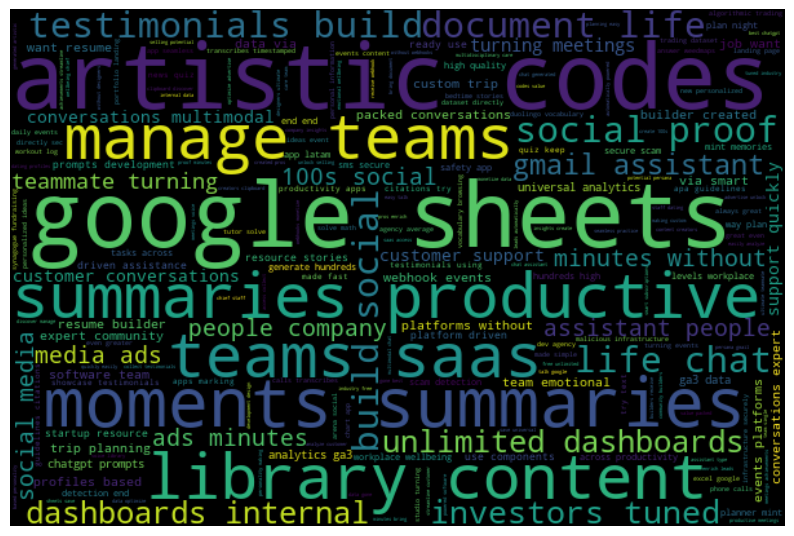

In [19]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud

wordcloud = WordCloud(width = 600,
                      height = 400,
                      random_state = 2,
                      max_font_size = 100).generate(all_words_lem)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')